In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Upload the data
df = pd.read_csv("FINAL.csv")
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary
0,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0.543860,...,135,208,29,20,28,43,91,304,303,2582160
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125000,...,3,3,2,0,0,0,1,2,512,449115
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,301,514,111,54,38,78,113,438,24,29592695
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,431,573,346,75,66,169,145,1197,201,5115492
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,198,236,98,22,58,54,94,704,66,17628340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Delon Wright,PG,28,SAC,126,78,3496,480,1036,0.463320,...,408,538,556,202,60,166,150,1290,140,9000000
537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,0.558912,...,255,423,291,74,40,137,152,823,86,13545000
538,Trae Young,PG,22,ATL,63,63,2125,487,1112,0.437950,...,207,245,594,53,12,261,111,1594,175,6571800
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,209,328,86,27,17,51,121,451,76,15415730


In [3]:
df1 = df.loc[df["Pos"]=="C"]

In [4]:
# Create the input variables
X = df1.drop(columns=["Player", "Tm", "Pos", "ID", "Salary"])

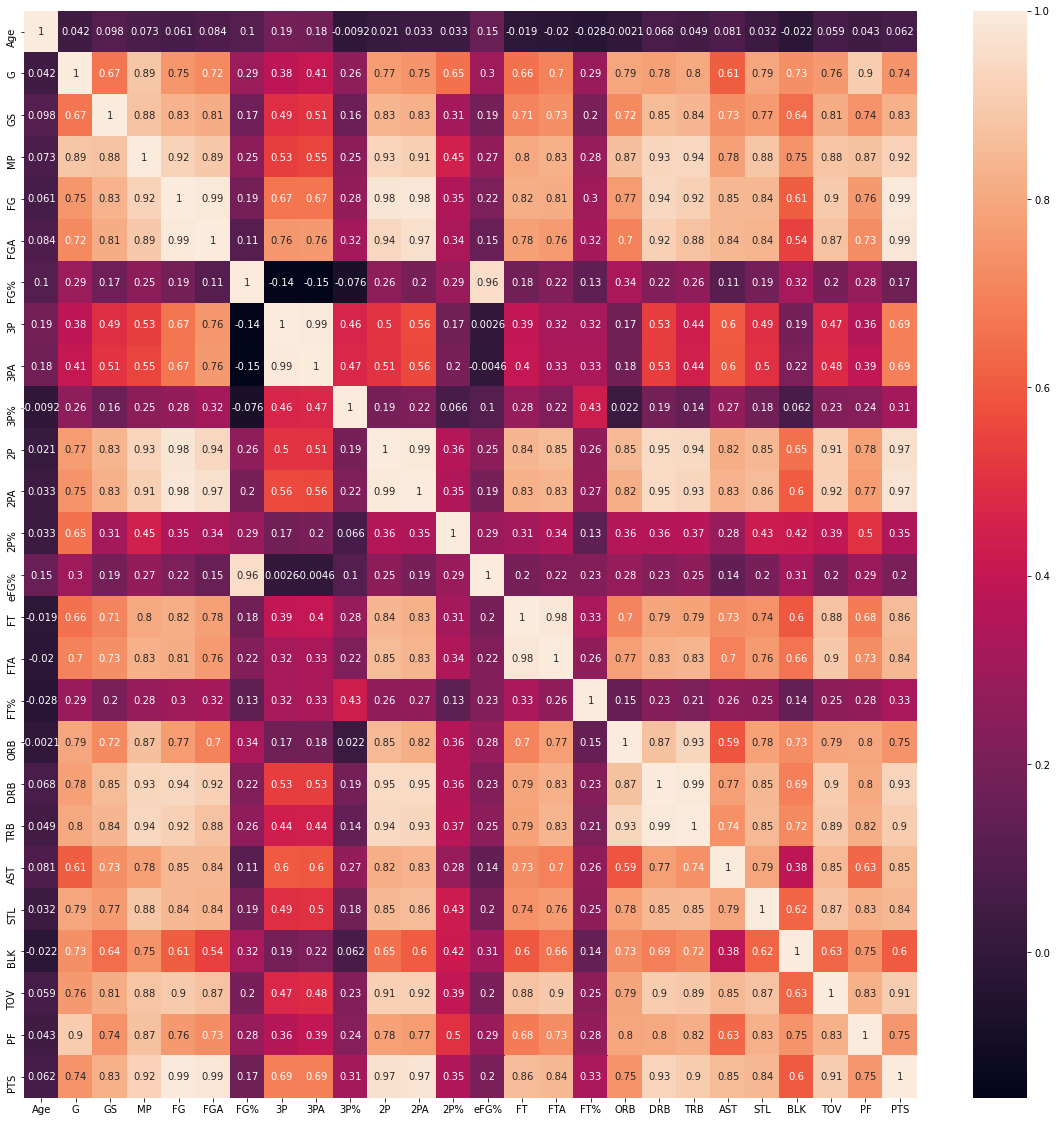

In [5]:
corrMatrix = X.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
# Create the clustering model
#clustering = AgglomerativeClustering(n_clusters=int((len(X)/3))).fit(X)
clustering = AgglomerativeClustering(n_clusters=13).fit(X)
Counter(clustering.labels_)

Counter({3: 12,
         2: 3,
         11: 8,
         9: 1,
         10: 5,
         12: 12,
         8: 10,
         4: 20,
         6: 15,
         5: 3,
         0: 2,
         1: 7,
         7: 1})

In [7]:
df1["Label"] = clustering.labels_
df1

<ipython-input-7-2c8a5e937266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Label"] = clustering.labels_


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary,Label
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,514,111,54,38,78,113,438,24,29592695,3
3,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570000,...,573,346,75,66,169,145,1197,201,5115492,2
4,LaMarcus Aldridge,C,35,BRK,52,46,1348,280,592,0.472973,...,236,98,22,58,54,94,704,66,17628340,11
8,Jarrett Allen,C,22,CLE,126,90,3728,596,964,0.618257,...,1262,212,64,180,200,192,1612,243,3909902,9
21,Deandre Ayton,C,22,PHO,69,69,2115,430,687,0.625910,...,727,99,41,81,103,196,997,121,10018200,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Robert Williams,C,23,BOS,52,13,985,186,258,0.720930,...,358,94,43,91,52,105,417,346,2029920,4
533,James Wiseman,C,19,GSW,39,27,836,191,368,0.519022,...,226,26,11,36,60,121,448,144,8730240,4
534,Christian Wood,C,25,HOU,41,41,1326,329,640,0.514062,...,395,71,34,48,80,88,860,91,13015874,11
539,Cody Zeller,C,28,CHO,48,21,1005,181,324,0.558642,...,328,86,27,17,51,121,451,76,15415730,4


In [8]:
df1.loc[df1["Label"]==3]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary,Label
2,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,514,111,54,38,78,113,438,24,29592695,3
47,Bismack Biyombo,C,28,CHO,66,36,1349,142,242,0.586777,...,347,81,17,74,71,141,331,264,3500000,3
61,Tony Bradley,C,23,OKC,84,16,1368,262,394,0.664975,...,478,74,30,60,66,122,600,262,3542060,3
231,Dwight Howard,C,35,PHI,69,6,1196,178,303,0.587459,...,580,61,30,62,112,200,482,304,2564753,3
267,DeAndre Jordan,C,32,BRK,57,43,1246,190,249,0.763052,...,427,93,17,65,85,116,426,117,10375678,3
300,Robin Lopez,C,32,WAS,71,9,1354,269,425,0.632941,...,272,55,15,44,75,109,642,163,7300000,3
368,Nerlens Noel,C,26,NYK,64,41,1547,137,223,0.614350,...,408,46,70,141,65,176,324,208,5000000,3
403,Mason Plumlee,C,30,DET,56,56,1499,234,381,0.614173,...,519,202,43,50,105,186,581,152,8000000,3
469,Isaiah Stewart,C,19,DET,68,14,1455,226,409,0.552567,...,453,59,39,86,67,184,537,280,3121080,3
495,Myles Turner,C,24,IND,47,47,1455,206,432,0.476852,...,306,48,40,159,67,165,592,61,18000000,3


In [11]:
player_label = df1.loc[df1["Player"]=="Ivica Zubac"]["Label"].values[0]
player_label

3

In [26]:
output = df1.loc[df1["Label"]==player_label].reset_index().drop(columns=["index"])
output

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Salary,Label
0,Steven Adams,C,27,NOP,58,58,1605,189,308,0.613636,...,514,111,54,38,78,113,438,24,29592695,3
1,Bismack Biyombo,C,28,CHO,66,36,1349,142,242,0.586777,...,347,81,17,74,71,141,331,264,3500000,3
2,Tony Bradley,C,23,OKC,84,16,1368,262,394,0.664975,...,478,74,30,60,66,122,600,262,3542060,3
3,Dwight Howard,C,35,PHI,69,6,1196,178,303,0.587459,...,580,61,30,62,112,200,482,304,2564753,3
4,DeAndre Jordan,C,32,BRK,57,43,1246,190,249,0.763052,...,427,93,17,65,85,116,426,117,10375678,3
5,Robin Lopez,C,32,WAS,71,9,1354,269,425,0.632941,...,272,55,15,44,75,109,642,163,7300000,3
6,Nerlens Noel,C,26,NYK,64,41,1547,137,223,0.614350,...,408,46,70,141,65,176,324,208,5000000,3
7,Mason Plumlee,C,30,DET,56,56,1499,234,381,0.614173,...,519,202,43,50,105,186,581,152,8000000,3
8,Isaiah Stewart,C,19,DET,68,14,1455,226,409,0.552567,...,453,59,39,86,67,184,537,280,3121080,3
9,Myles Turner,C,24,IND,47,47,1455,206,432,0.476852,...,306,48,40,159,67,165,592,61,18000000,3


In [27]:
for index, row in output.iterrows():
    print(row["Player"], index)

Steven Adams 0
Bismack Biyombo 1
Tony Bradley 2
Dwight Howard 3
DeAndre Jordan 4
Robin Lopez 5
Nerlens Noel 6
Mason Plumlee 7
Isaiah Stewart 8
Myles Turner 9
Moritz Wagner 10
Ivica Zubac 11
